# Kleiner Test

In [1]:
from n2 import ConnectGene, NodeGene, NodeTypes, Individuum
import numpy as np
import gymnasium as gym

In [2]:
def simplest_ind(n_inputs, n_outputs, bias=False):
    node_genes = []
    connect_genes = []
    for i in range(n_inputs):
        node_genes.append(NodeGene(NodeTypes.Input))
    for i in range(n_outputs):
        node_genes.append(NodeGene(NodeTypes.Output))
    if bias:
        node_genes.append(NodeGene(NodeTypes.Bias))
        
    for i in range(n_inputs):
        for j in range(n_outputs):
            connect_genes.append(ConnectGene(node_genes[i].marking, node_genes[j+n_inputs].marking, np.random.uniform(low=-1, high=1)))
    return Individuum(node_genes, connect_genes)

In [3]:
POP_SIZE = 3
GENERATIONS = 100
MUTATE_SMALL = {
    'weight': {
        'rate': 0.8,
        'reset': 0.1
    },
    'connection': 1.0,
    'node': 0.0
}
MUTATE_BIG = {
    'weight': {
        'rate': 0.8,
        'reset': 0.1
    },
    'connection': 0.3,
    'node': 0.03
}

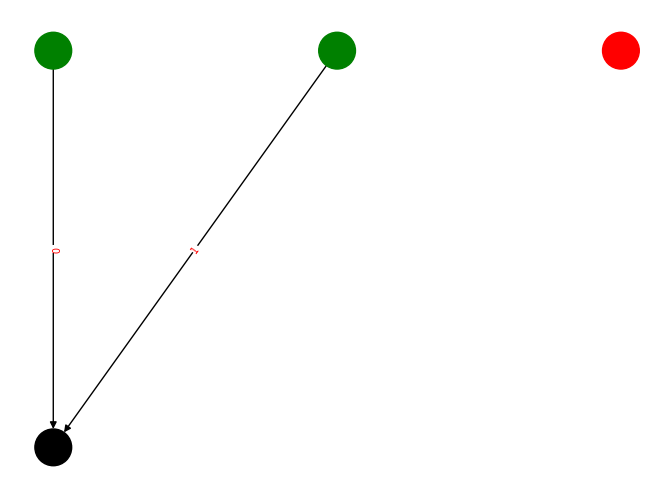

In [4]:
ind = simplest_ind(2, 1, bias=True)
ind.plot()

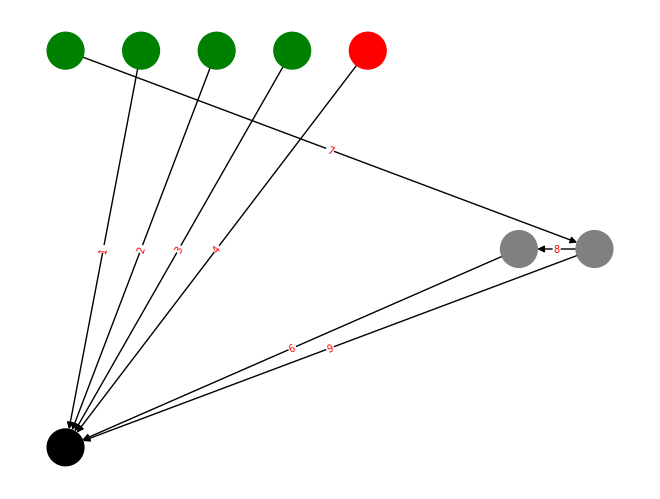

In [10]:
from IPython.display import clear_output

ind.mutate(MUTATE_SMALL)
ind.plot()

In [11]:
MUTATE_SMALL = {
    'weight': {
        'rate': 0.8,
        'reset': 0.1
    },
    'connection': 0.0,
    'node': 1.0
}

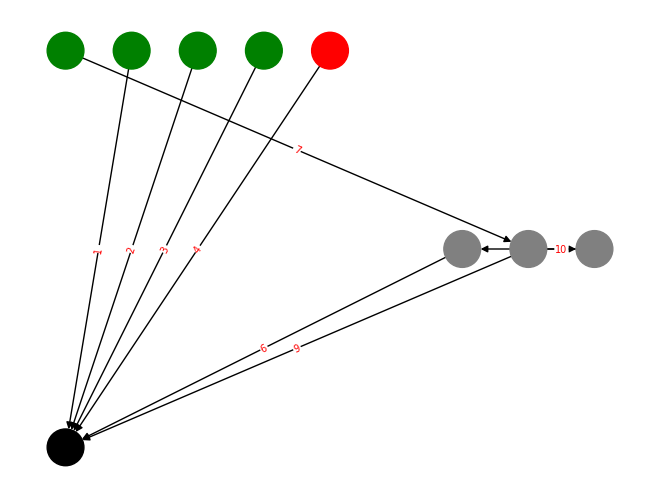

In [12]:
ind.mutate(MUTATE_SMALL)
ind.plot()

In [5]:
ind.printsum()

Node: 0
Node: 1
Node: 2
Node: 3
Connect: 0
In Node: 0
Out Node: 2
Weight: 0.6804516277672454
Disabled: False

Connect: 1
In Node: 1
Out Node: 2
Weight: 0.6864226819046355
Disabled: False



In [11]:
inp = np.array([[0,0],[0,1],[1,0],[1,1]])
out = np.array([[0],[1],[1],[0]])

def fitness(ind: Individuum):
    ind.fitness = 0
    for i,o in zip(inp,out):
        raw = ind.forward(i)
        rounded = raw.round()
        if rounded == o: 
            ind.fitness += 1
    return ind.fitness

In [7]:
print([ind.forward(inp[i]) for i in range(4)])
print(fitness(ind))

[array([0.5]), array([0.96707783]), array([0.96612872]), array([0.99880792])]
3


In [3]:
MUTATE_SMALL = {
    'weight': {
        'rate': 0.8,
        'reset': 0.1
    },
    'connection': 0.0,
    'node': 1.0
}

In [9]:
ConnectGene.marking = 0
NodeGene.marking = 0
mom = simplest_ind(2, 1, bias=True)
print("mom")
mom.printsum()
dad = Individuum.copy(mom)
print("dad")
dad.printsum()
print("mutated dad")
dad.mutate(MUTATE_SMALL)
dad.printsum()

mom
Node: 0
Node: 1
Node: 2
Node: 3
Connect: 0
In Node: 0
Out Node: 2
Weight: 0.858785766549006
Disabled: False

Connect: 1
In Node: 1
Out Node: 2
Weight: -0.16171504021519056
Disabled: False

dad
Node: 0
Node: 1
Node: 2
Node: 3
Connect: 0
In Node: 0
Out Node: 2
Weight: 0.858785766549006
Disabled: False

Connect: 1
In Node: 1
Out Node: 2
Weight: -0.16171504021519056
Disabled: False

mutated dad
Node: 0
Node: 1
Node: 2
Node: 3
Node: 4
Connect: 0
In Node: 0
Out Node: 2
Weight: 0.7621719945811432
Disabled: True

Connect: 1
In Node: 1
Out Node: 2
Weight: -0.2991501358063728
Disabled: False

Connect: 2
In Node: 0
Out Node: 4
Weight: 0.4274222956865773
Disabled: False

Connect: 3
In Node: 4
Out Node: 2
Weight: 0.886379985259429
Disabled: False



In [12]:
print(fitness(dad))
print(fitness(mom))

2
2


In [16]:
child = mom.crossover(dad)

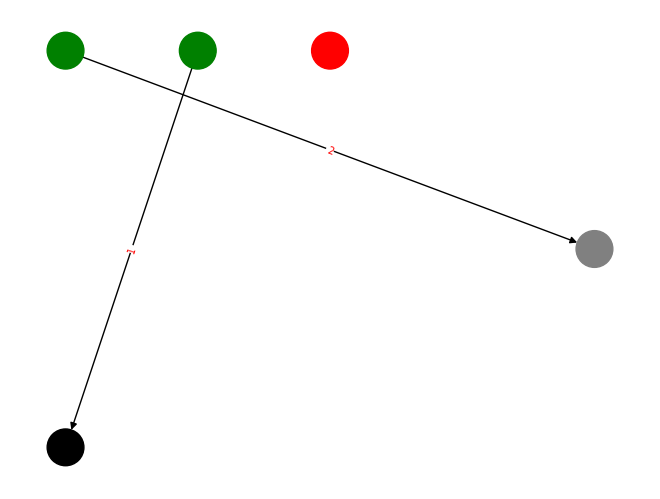

Node: 0
Node: 1
Node: 2
Node: 3
Node: 4
Connect: 0
In Node: 0
Out Node: 2
Weight: 0.7621719945811432
Disabled: True

Connect: 1
In Node: 1
Out Node: 2
Weight: -0.2991501358063728
Disabled: False

Connect: 2
In Node: 0
Out Node: 4
Weight: 0.4274222956865773
Disabled: False



In [17]:
child.plot()
child.printsum()